In [1]:
!pip install -q -U "tensorflow-text==2.8.*"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.0/498.0 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 75.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.3/462.3 KB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 100.3 MB/s eta 0:00:00


In [2]:
!pip install -q tf-models-official==2.7.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 44.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.9/118.9 KB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 KB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 72.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 352.1/352.1 KB 36.2 MB/s eta 0:00:00


In [3]:
import pandas
import numpy as np 
import pandas as pd
import math
import numpy as np
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
import os, glob
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional, GRU
import tensorflow
from tensorflow.keras.layers import Dropout
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
import tensorflow_hub as hub
import tensorflow as tf

# Import Data

In [5]:
url = 'https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz'

dataset = tf.keras.utils.get_file('aclImdb_v1.tar.gz', url,
                                  untar=True, cache_dir='.',
                                  cache_subdir='')

dataset_dir = os.path.join(os.path.dirname(dataset), 'aclImdb')

train_dir = os.path.join(dataset_dir, 'train')

# remove unused folders to make it easier to load the data
remove_dir = os.path.join(train_dir, 'unsup')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!tar xvzf /content/aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [7]:
def append_dir_data(path, data=[], label=0):
    for filename in glob.glob(os.path.join(path, '*.txt')):
        with open(filename, 'r', encoding="utf8") as f:
            text = f.read()
            data.append([text, label])

    return data

In [8]:
data = append_dir_data('/content/aclImdb/train/pos', label=1)
data = append_dir_data('/content/aclImdb/train/neg', data, label=0)
df_train = pd.DataFrame(data, columns=['text', 'label'])
df_train

,text,label
0,Soylent Green is a classic. I have been waitin...,1
1,Just as Tom Berenger put you into the soul of ...,1
2,Although I agree that it's a good but not grea...,1
3,"This is where the term ""classic film"" comes fr...",1
4,So fortunate were we to see this fantastic fil...,1
...,...,...
24995,I try to be very objective when I view a low b...,0
24996,"America. A land of freedom, of hope and of dre...",0
24997,"I saw Crispin Glover's ""What Is It?"" at the An...",0
24998,The various nudity scenes that other reviewers...,0


In [9]:
data_test = append_dir_data('/content/aclImdb/test/pos', label=1)
data_test = append_dir_data('/content/aclImdb/test/neg', data_test, label=0)
df_test = pd.DataFrame(data_test, columns=['text', 'label'])
df_test

,text,label
0,Soylent Green is a classic. I have been waitin...,1
1,Just as Tom Berenger put you into the soul of ...,1
2,Although I agree that it's a good but not grea...,1
3,"This is where the term ""classic film"" comes fr...",1
4,So fortunate were we to see this fantastic fil...,1
...,...,...
49995,"When I first saw ""Race Against Fear"" (don't yo...",0
49996,I'm seeing a pattern here. If you see a movie ...,0
49997,I'm a huge Zack Allan fan and was disappointed...,0
49998,I don't know about the rest of the viewers of ...,0


In [10]:
# there is no replacement by defualt in this fucntion
df_train = df_train.sample(frac=1)
df_test = df_train.sample(frac=1)

# Data preprocessing

lower case

In [11]:
df_train['text'] = df_train['text'].apply(lambda x: x.lower())
df_test['text'] = df_test['text'].apply(lambda x: x.lower())
df_train.head(5)

,text,label
20939,"as a native film professor, i can honestly say...",0
18923,"i watched the first 15 minutes, thinking it wa...",0
9639,"very good point there : ""only an elite few (th...",1
1059,this movie was so good. leon phelps is hilario...,1
19482,i loved adrianne curry before this show. i tho...,0


Remove punctuations

In [12]:
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
df_train.head(5)

,text,label
20939,as a native film professor i can honestly say ...,0
18923,i watched the first 15 minutes thinking it was...,0
9639,very good point there only an elite few the u...,1
1059,this movie was so good leon phelps is hilariou...,1
19482,i loved adrianne curry before this show i thou...,0


remove URL

In [13]:
df_train['text'] = df_train['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df_test['text'] = df_test['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df_train.head(10)

,text,label
20939,as a native film professor i can honestly say ...,0
18923,i watched the first 15 minutes thinking it was...,0
9639,very good point there only an elite few the u...,1
1059,this movie was so good leon phelps is hilariou...,1
19482,i loved adrianne curry before this show i thou...,0
4289,well made and stylish while still ultimately m...,1
5853,for the first three seasons sabrina was a gem ...,1
15862,the only way we survived this stinker was by c...,0
1749,after youve seen this small likable and comica...,1
808,this movie is totally wicked its really great ...,1


tokenise

In [14]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [15]:
df_train['text'] = df_train['text'].apply(lambda x: word_tokenize(x))
df_test['text'] = df_test['text'].apply(lambda x: word_tokenize(x))
df_train.head(10)

,text,label
20939,"[as, a, native, film, professor, i, can, hones...",0
18923,"[i, watched, the, first, 15, minutes, thinking...",0
9639,"[very, good, point, there, only, an, elite, fe...",1
1059,"[this, movie, was, so, good, leon, phelps, is,...",1
19482,"[i, loved, adrianne, curry, before, this, show...",0
4289,"[well, made, and, stylish, while, still, ultim...",1
5853,"[for, the, first, three, seasons, sabrina, was...",1
15862,"[the, only, way, we, survived, this, stinker, ...",0
1749,"[after, youve, seen, this, small, likable, and...",1
808,"[this, movie, is, totally, wicked, its, really...",1


Remove stop words

In [16]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
df_train['text'] = df_train['text'].apply(lambda x: [w for w in x if not w.lower() in stop_words])
df_test['text'] = df_test['text'].apply(lambda x: [w for w in x if not w.lower() in stop_words])

df_train.head(5)

,text,label
20939,"[native, film, professor, honestly, say, perha...",0
18923,"[watched, first, 15, minutes, thinking, real, ...",0
9639,"[good, point, elite, upper, classes, would, ac...",1
1059,"[movie, good, leon, phelps, hilarious, went, b...",1
19482,"[loved, adrianne, curry, show, thought, great,...",0


Stemming

In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

ps = PorterStemmer()

df_train['text'] = df_train['text'].apply(lambda x: [ps.stem(w) for w in x])
df_test['text'] = df_test['text'].apply(lambda x: [ps.stem(w) for w in x])

df_train.head(5)

,text,label
20939,"[nativ, film, professor, honestli, say, perhap...",0
18923,"[watch, first, 15, minut, think, real, documen...",0
9639,"[good, point, elit, upper, class, would, acces...",1
1059,"[movi, good, leon, phelp, hilari, went, bought...",1
19482,"[love, adriann, curri, show, thought, great, t...",0


# Bert

In [19]:
import tensorflow_text

In [20]:
def build_classifier_model():
  text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
  preprocessing_layer = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", name='preprocessing')
  encoder_inputs = preprocessing_layer(text_input)
  encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-6_H-512_A-8/2", trainable=True, name='BERT_encoder')
  outputs = encoder(encoder_inputs)
  net = outputs['pooled_output']
  net = tf.keras.layers.Dropout(0.15)(net)
  net = tf.keras.layers.Dense(32, activation='relu', name='Dense1')(net)
  net = tf.keras.layers.Dropout(0.15)(net)
  net = tf.keras.layers.Dense(16, activation='relu', name='Dense2')(net)
  net = tf.keras.layers.Dropout(0.1)(net)
  net = tf.keras.layers.Dense(1, activation=None, name='classifier')(net)
  return tf.keras.Model(text_input, net)

In [24]:
classifier_model = build_classifier_model()

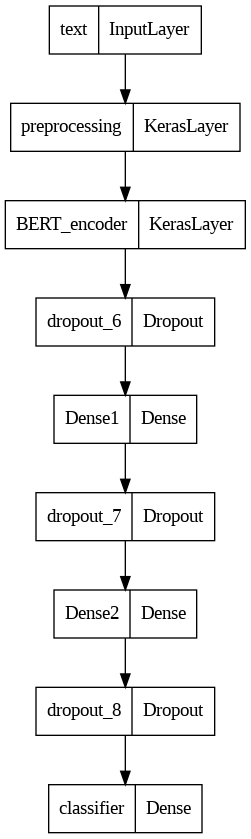

In [25]:
tf.keras.utils.plot_model(classifier_model)

In [26]:
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
metrics = tf.metrics.BinaryAccuracy()

In [27]:
!pip install -q tf-models-official==2.7.0

Calcuate cordinality

In [28]:

# Convert each text entry in the 'text' column to a string
train_text = df_train['text'].apply(lambda x: str(x)).values

# Convert the list of strings to a TensorFlow tensor
text_tensor = tf.constant(train_text)

# Create the dataset
dataset = tf.data.Dataset.from_tensor_slices(text_tensor)

# Calculate the cardinality of the dataset
cardinality = tf.data.experimental.cardinality(dataset)

# Convert the result to a NumPy array
cardinality = cardinality.numpy()


In [29]:
# Convert each text entry in the 'text' column to a string
test_text = df_test['text'].apply(lambda x: str(x)).values

In [30]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, y_val = train_test_split(test_text, df_test['label'], test_size=0.25, random_state=42)
X_test.shape, X_val.shape, y_test.shape, y_val.shape

((18750,), (6250,), (18750,), (6250,))

In [31]:
from official.nlp import optimization  # to create AdamW optimizer

epochs = 25
steps_per_epoch = cardinality 
num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)

init_lr = 3e-5
optimizer = optimization.create_optimizer(init_lr=init_lr,
                                          num_train_steps=num_train_steps,
                                          num_warmup_steps=num_warmup_steps,
                                          optimizer_type='adamw')

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [32]:
classifier_model.compile(optimizer=optimizer,
                         loss=loss,
                         metrics=metrics)

In [33]:
new_history = classifier_model.fit(train_text,
                                df_train["label"],
                                validation_data=(X_val,y_val),
                                epochs=epochs)

Epoch 1/25
782/782 [==============================] - 330s 404ms/step - loss: 0.7298 - binary_accuracy: 0.4971 - val_loss: 0.6900 - val_binary_accuracy: 0.5034
Epoch 2/25
782/782 [==============================] - 320s 409ms/step - loss: 0.6917 - binary_accuracy: 0.5106 - val_loss: 0.6694 - val_binary_accuracy: 0.5526
Epoch 3/25
782/782 [==============================] - 317s 405ms/step - loss: 0.6723 - binary_accuracy: 0.5527 - val_loss: 0.6332 - val_binary_accuracy: 0.6043
Epoch 4/25
782/782 [==============================] - 313s 400ms/step - loss: 0.6340 - binary_accuracy: 0.6142 - val_loss: 0.5979 - val_binary_accuracy: 0.6398
Epoch 5/25
782/782 [==============================] - 321s 411ms/step - loss: 0.6003 - binary_accuracy: 0.6618 - val_loss: 0.5555 - val_binary_accuracy: 0.7205
Epoch 6/25
782/782 [==============================] - 317s 405ms/step - loss: 0.5735 - binary_accuracy: 0.6934 - val_loss: 0.5476 - val_binary_accuracy: 0.7440
Epoch 7/25
782/782 [====================

In [35]:
history = new_history

In [36]:
loss, accuracy = classifier_model.evaluate(X_test,y_test)

print(f'Loss: {loss}')
print(f'Accuracy: {accuracy}')

586/586 [==============================] - 115s 196ms/step - loss: 0.1140 - binary_accuracy: 0.9452
Loss: 0.11396937817335129
Accuracy: 0.9451733231544495


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


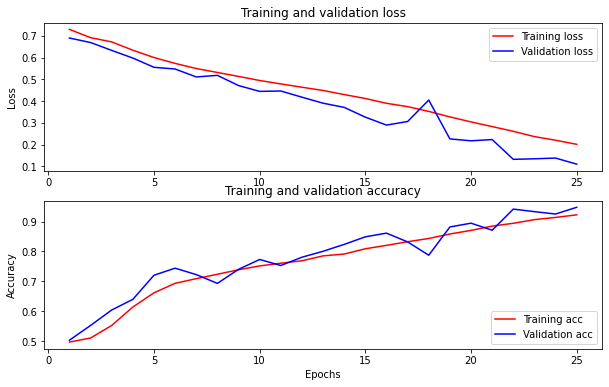

In [37]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()

plt.subplot(2, 1, 1)
# r is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
# plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [39]:
preds = classifier_model.predict(X_test)
preds

array([[-3.859016 ],
       [-1.1642755],
       [ 3.8320675],
       ...,
       [ 4.780061 ],
       [-4.5493956],
       [-4.967571 ]], dtype=float32)

In [ ]:
preds = [0 if row < 0.50 else 1 for row in preds]
preds = np.array(preds)

In [44]:
y_test

17506    0
4735     1
1267     1
16890    0
10563    1
        ..
13802    0
6161     1
1236     1
19980    0
17039    0
Name: label, Length: 18750, dtype: int64

In [52]:
def show_report_model(y_true, pred):
    print(classification_report(y_true, pred))
    print("******")
    cm = confusion_matrix(y_true, pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=[0, 1], yticklabels=[0, 1])

    print(f'accuracy model {accuracy_score(y_true, preds) * 100} % \n \n')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    print(f'confusion_matrix \n')
    plt.show(block=False)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      9355
           1       1.00      0.89      0.94      9395

    accuracy                           0.95     18750
   macro avg       0.95      0.95      0.95     18750
weighted avg       0.95      0.95      0.95     18750

******
accuracy model 94.51733333333333 % 
 

confusion_matrix 



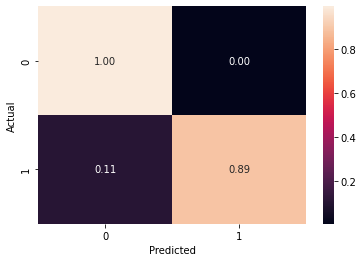

In [54]:
show_report_model(y_test, preds)